In [15]:
# imports
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
 
# routines to read in tables of data
import pandas as pd

# routines to calculate distances, etc. in a given cosmology
import astropy.cosmology as cosmo

# Fitting for Cosmological Parameters with MCMC Methods

We will work with a newer compilation of supernova distances, the Pantheon sample from Scolnic et al. 2018, today.  Again, we can read it in with `pandas`.

We will try to use the supernova data to fit for the values of two fundamental cosmological parameters, the fraction of the critical density of the universe that is in matter ($\Omega_m$) and the fraction that is in dark energy ($\Omega_\Lambda$), for models containing dark energy and matter but no other components (the critical density is the density of the Universe such that it will have a flat, Euclidean geometry rather than being curved on average).

First, we read in the data...

In [16]:
# CHANGE THE BELOW LINE TO POINT TO THE DIRECTORY CONTAINING pantheon.csv
path = './'  

# the file is in comma-separated (csv)  format so we use read_csv
data=pd.read_csv(path+'pantheon.csv')

# for convenience, make variables for each column.
redshift = data['redshift'].values
mu = data['mu'].values
error = data['error'].values

# we want to sort the arrays to be in redshift order.  
# We can get the set of indices that would sort array `x` with the function 
#     x.argsort()
# This is a method of numpy arrays 
# (i.e. a function that is attached to/provided by the variable)
index = redshift.argsort()

# sort all of our arrays
redshift=redshift[index]
mu=mu[index]
error=error[index]


Number of supernovae: 1048


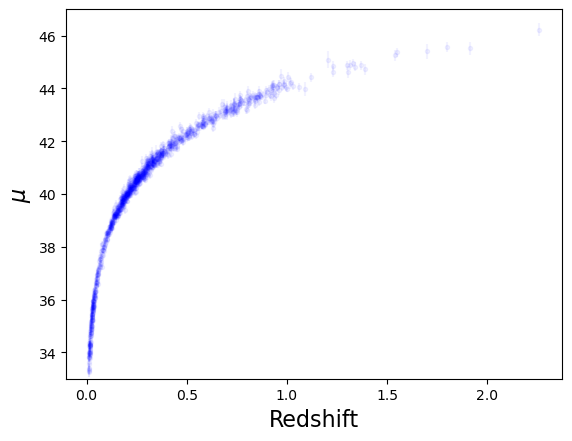

In [17]:
# Let's plot distance modulus vs. redshift...
print(f'Number of supernovae: {len(mu)}')
plt.errorbar(redshift,mu,yerr=error,fmt='b.',alpha=0.05)
plt.ylim(33,47)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel(r'$\mu$',fontsize=16)
#plt.xscale('log')
plt.show()

## Calculating cosmological functions with `astropy`

We want to calculate the distance modulus to each supernova predicted by a given cosmological model.  We can use the `cosmology` module in `astropy` for this (we've imported it with the name `cosmo` above).

Basically, we first choose our cosmological model; in this case, we will investigate $\Lambda$CDM models (i.e., models with dark matter and a cosmological constant).  Thus, we use the `cosmo.LambdaCDM` function to choose a model.  __Get help on this function in the box below, using ?.__

In [18]:
cosmo.LambdaCDM?

Init signature:
cosmo.LambdaCDM(
    H0: 'Parameter',
    Om0: 'Parameter',
    Ode0: 'Parameter',
    Tcmb0: 'Parameter' = Parameter(default=<Quantity 0. K>, derived=False, unit=Unit("K"), equivalencies=[], fvalidate='scalar', doc='Temperature of the CMB at z=0.'),
    Neff: 'Parameter' = Parameter(default=3.04, derived=False, unit=None, equivalencies=[], fvalidate='non-negative', doc='Number of effective neutrino species.'),
    m_nu: 'Parameter' = Parameter(default=<Quantity 0. eV>, derived=False, unit=Unit("eV"), equivalencies=[(Unit("kg"), Unit("J"), <function mass_energy.<locals>.<lambda> at 0x17a8aed40>, <function mass_energy.<locals>.<lambda> at 0x17a8aeca0>), (Unit("kg / m2"), Unit("J / m2"), <function mass_energy.<locals>.<lambda> at 0x17a8aec00>, <function mass_energy.<locals>.<lambda> at 0x17a8aeb60>), (Unit("kg / m3"), Unit("J / m3"), <function mass_energy.<locals>.<lambda> at 0x17a8aeac0>, <function mass_energy.<locals>.<lambda> at 0x17a8ae980>), (Unit("kg / s"), Unit("J 

__Now, in the box below, we initialize the function with $H_0 = 70$ (the value adopted for this supernova dataset; the $H_0$ will ultimately cancel out of the analysis), $\Omega_m = 0.3$, and $\Omega_\Lambda = 0.5$, putting the results in an object named `cosmology`.  We then print out the contents of that variable.__

In [19]:
omegam=0.3
omegal=0.5
cosmology=cosmo.LambdaCDM(H0=70,Om0=omegam,Ode0=omegal)
print(cosmology)

LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.5, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=0.0)


Next, we want to calculate the distance modulus for our chosen cosmological model; we can do this with `chosen_cosmology.distmod(z)`, where `z` is an array of redshifts and `chosen_cosmology` is the cosmology set up by a cosmo routine like `LambdaCDM` (there are a variety of other possible choices).  To avoid any bugs later, we explicitly convert the result into a numpy array.

I.e.:

In [20]:
model=np.array( cosmology.distmod(redshift) )

In the code box below, we plot the distance modulus of the supernovae as a function of redshift (as points), then overplot the distance modulus predicted in this model (as a line).  __Evaluate: Does this look like a good fit based on this plot?__

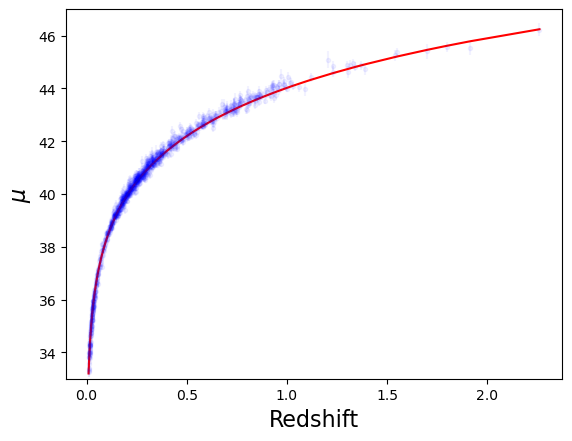

In [21]:
plt.errorbar(redshift,mu,yerr=error,fmt='b.',alpha=0.05)
plt.ylim(33,47)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel(r'$\mu$',fontsize=16)
#plt.xscale('log')

plt.plot(redshift,model,'r-')

To clarify whether and where a model is failing, it can be helpful to plot the residuals: i.e., the data values (here, the mu array) minus the model.  Ideally they should scatter evenly around zero.  We plot the residuals between mu and the model distance modulus for each supernova, as a function of redshift, in the code box below. __Assess whether this seems like a satisfactory fit to the data: why or why not?__ 

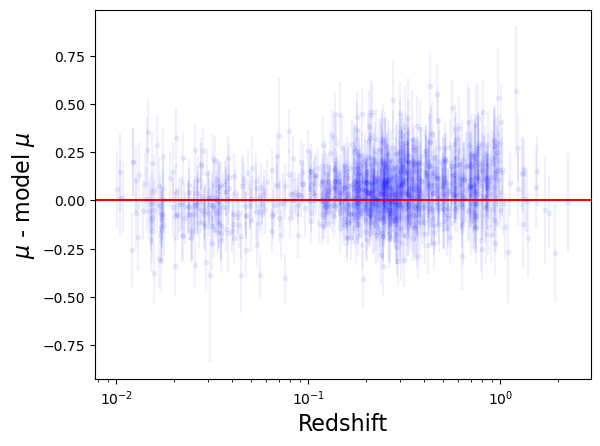

In [22]:
plt.errorbar(redshift,mu-model,yerr=error,fmt='b.',alpha=0.06)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel(r'$\mu$ - model $\mu$',fontsize=16)
plt.xscale('log')
plt.axhline(0,color='red')

Text(0, 0.5, 'Residual')

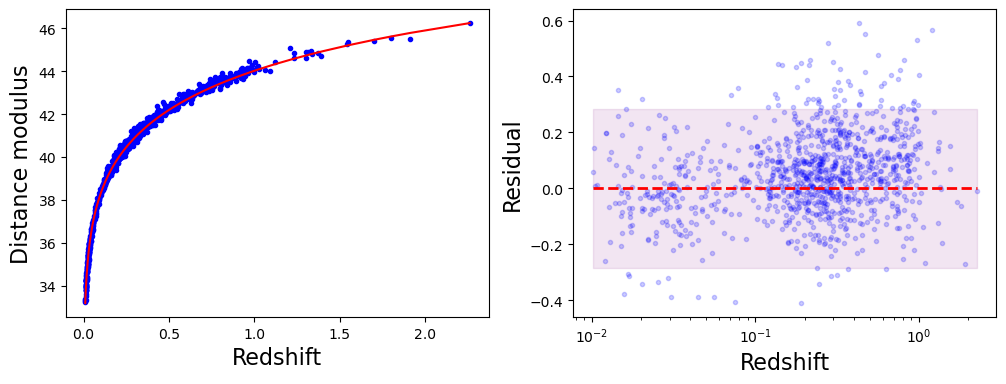

In [23]:
#  Code for putting plots of both trend + residuals side-by-side

# set up a largely horizontal plotting space
plt.figure(figsize=[12,4])

# we'll make 2 plots: one of distance modulus vs. redshift,
# and one of residuals.  

plt.subplot(1,2,1) 
# distance modulus plot
plt.plot(redshift,mu,'b.')
plt.plot(redshift,model,'r-')
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Distance modulus',fontsize=16)

plt.subplot(1,2,2) 
        # residuals plot
plt.plot(redshift,mu-model,'b.',alpha=0.2)
    
        # add a dashed line at zero, from the minimum to maximum value
        #   in the redshift array
plt.semilogx([redshift.min(),redshift.max()],[0,0],'r--',lw=2)

        # calculate the average error: note that we can get this from 
        #     another method, .mean(),  attached to numpy arrays
mean_error = error.mean()
    
        # shade the 2 sigma region.  95% of the points (i.e. all but  
        #   about 50, on average) should be in this region.
plt.fill_between([redshift.min(),redshift.max()],[-2*mean_error,-2*mean_error],
                           [2*mean_error,2*mean_error],alpha=0.1,color='purple')
    
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Residual',fontsize=16)
    

### Preparing for applying MCMC methods

We will use the `emcee` package for our analysis; see http://dfm.io/emcee/current/ for documentation.

Our MCMC calculations will need us to define functions for the prior, likelihood, and posterior.  In our case, we assume the supernova distance modulus errors are all Gaussian, so the likelihood looks like 

$L = \prod {1 \over {(2 \pi \sigma^2)}^{1/2} } {\rm e}^{-(\mu_i - \mu_{model,i})^2 \over (2 \sigma_i^2)} $

where $\mu_i$ is the distance modulus for the i'th supernova, $\mu_{model,i}$ is the distance modulus for that SN predicted for a particular cosmological model, and $\sigma_i$ is the uncertainty in the $i$'th distance modulus.  We adopt priors that are exponential in   $\log \Omega$ to avoid singularities, and calculate log likelihood instead of likelihood.  

We implement this below, defining theta as a vector of the logs of the cosmological parameters ($\Omega_m$ and $\Omega_\Lambda$).  By doing things this way we avoid the problem of `cosmology.distmod` returning errors when values of $\Omega$ are below zero.

In [24]:
def log_prior(theta):
    log_omegam, log_omegal = theta
# flat prior on omegas whereever omegam, omegal > 0, 
# translated into priors on log quantities
    output = np.exp(log_omegam)*np.exp(log_omegal)
    output = np.log(np.minimum(output,1.))
# if the output is not finite, 
# return a prior value of 0 (so log of prior = -infinity)
    if not np.isfinite(output):
        return -np.inf
    return output

def log_likelihood(theta, redshift, mu, sigma):
# perform tuple unpacking on theta
    log_omegam, log_omegal = theta
# calculate distance modulus    
    cosmology=cosmo.LambdaCDM(H0=70,Om0=np.exp(log_omegam),
                              Ode0=np.exp(log_omegal))
#astropy is a bit fragile (and fairly slow) for this application.  
# We will do some exception handling to try to prevent crashes:
    try:
        mu_predicted = np.array( cosmology.distmod(redshift) )
    except ZeroDivisionError:
        mu_predicted=redshift*0.+40.
    except OverflowError:
        mu_predicted=redshift*0.+40.
    except RuntimeWarning:
        mu_predicted=redshift*0.+40.
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2)
                         + (mu - mu_predicted) ** 2 / sigma ** 2)

def log_posterior(theta, redshift, mu, sigma):
    return log_prior(theta) + log_likelihood(theta, redshift, mu, sigma)


### Setting up initial guesses for emcee

`emcee` will run multiple Markov chains simultaneously; we will need to initialize each one to start somewhere.  Let's begin them all in the vicinity of a model with omegam = 0.4 and omegal = 0.5 (significantly off from where we think the true values are, which should be closer to 0.3 and 0.7).

See 
http://mattpitkin.github.io/samplers-demo/pages/samplers-samplers-everywhere/ for more (and much of the model for the current code).

In [25]:
Nens = 100   # number of 'walkers' in  the ensemble

mean_omegam = 0.4     # mean of the Gaussian prior for initial guesses
sigma_omegam = 0.1 # standard deviation of the Gaussian prior

mean_omegal = 0.5     # mean of the Gaussian prior for initial guesses
sigma_omegal = 0.1 # standard deviation of the Gaussian prior

# create initial omega_m points: 
initial_omegam = np.random.normal(mean_omegam, sigma_omegam, Nens) 
# create initial omega_l points
initial_omegal = np.random.normal(mean_omegal, sigma_omegal, Nens) 

# avoid negative values (nonsensical) by using 1E-3 as minimum possible value
initial_omegam = np.maximum(1E-2,initial_omegam)
initial_omegal = np.maximum(1E-2,initial_omegal)

# initial samples formatted to use as inputs
initial_samples = np.array([np.log(initial_omegam), 
                            np.log(initial_omegal)]).T 

ndims = initial_samples.shape[1] # number of parameters/dimensions

### Choosing parameters for the emcee sampling

We want to choose a 'burnin' number of steps we will ignore results from (as they still retain some memory of the initial guesses), and then a number of steps to continue beyond that point.

In [26]:
Nburnin = 80   # number of burn-in samples.  Often one will do >1000.
Nsamples = 100  # number of final posterior samples

### Initializing emcee

We create an object named sampler from the `emcee.EnsembleSampler` class:

In [27]:
import emcee # import the emcee package

print(f'emcee version: {emcee.__version__}')

# the data arrays used in calculating the posterior are passed
#  as 'arguments' in emcee:(the redshifts, the distance moduli,
#  and errors in our case).  We pass them as a tuple.
argslist = (redshift, mu, error)

# set up the sampler: we provide the number of walkers; 
# the number of dimensions we are sampling over; 
# the name of our posterior function; 
# and then the arguments, which provide the data values.
sampler = emcee.EnsembleSampler(Nens, ndims, log_posterior,
                                args=argslist)

emcee version: 3.1.6


### Now, we run emcee...

In [29]:
# we will use this to see how long things take
from time import time               

# pass the initial samples and total number of samples required

t0 = time() # store the time at start
sampler.reset()

# running with progress=True will show a progress bar
sampler.run_mcmc(initial_samples, Nsamples + Nburnin,
                 progress=True,store=True);
t1 = time() # store the time at end

print(f"Time taken to run 'emcee' is {t1-t0:.2f} seconds")

# extract the samples (removing the burn-in).  
# The first index in sampler.chain runs over the different walkers; 
#  the second, over the steps each walker takes; and the third,
#  over the different parameters being fit.
samples_emcee = sampler.chain[:, Nburnin:, :].reshape((-1, ndims))

lnprob_emcee = sampler.lnprobability[:,Nburnin:]

You must install the tqdm library to use progress indicators with emcee


Time taken to run 'emcee' is 9.60 seconds


# Checking the results from MCMC

There are a few things to look at to evaluate results from MCMC and make sure everything is working properly.

## __1) Look at the acceptance rate of steps for each walker.  If this is near zero, the walkers are having trouble finding good parts of parameter space; if one, they aren't exploring at all.  20-50% is generally seen as ideal.__

In [12]:
print(f'Mean of acceptance fraction across walkers: {np.mean(sampler.acceptance_fraction):.4f}')

print(f'Std. dev. of acceptance fraction across walkers: {np.std(sampler.acceptance_fraction):.4f}')

Mean of acceptance fraction across walkers: 0.6723
Std. dev. of acceptance fraction across walkers: 0.0419


## __2) Look at the trajectory the walkers take in each parameter.__  

You should find that after an initial period where they start close to their initial position, they bounce around a more limited range once they find a good regime in parameter space.  __The initial part of the chains (the 'burn-in') should be discarded and not used in analysis.__

Text(0, 0.5, '$\\Omega_m$')

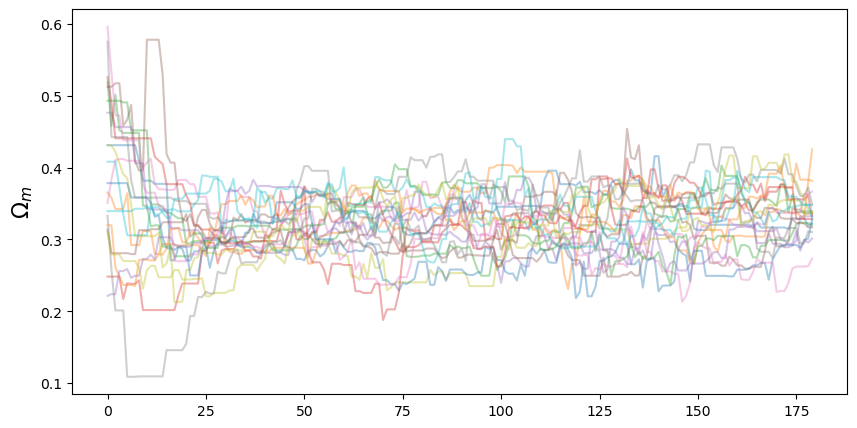

In [13]:
plt.figure(figsize=(10,5))
for i in np.arange(0,Nens,5):
    plt.plot(np.exp(sampler.chain[i,:,0]),alpha=0.37)
plt.ylabel(r'$\Omega_m$',fontsize=16)    

Text(0, 0.5, '$\\Omega_\\Lambda$')

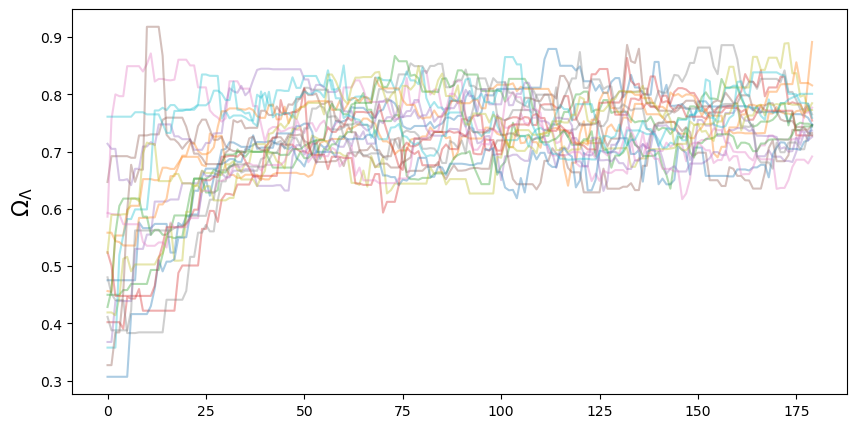

In [14]:
plt.figure(figsize=(10,5))
for i in np.arange(0,Nens,5):
    plt.plot(np.exp(sampler.chain[i,:,1]),alpha=0.37)
plt.ylabel(r'$\Omega_\Lambda$',fontsize=16)    

## __3) Look at the distributions of values in the chains in one dimension (which should be proportional to the posterior for each parameter) and in each pair of dimensions.__   

__Make sure that if there are multiple islands of nonnegligible probability they are well-explored, and that there are not islands of probability concentrated around your initial guess.__

Dan Foreman-Mackey's `corner` Python package provides a good way of doing this, with one major caveat: it draws contours that do __NOT__ correspond to 68, 95%, etc. confidence intervals, by default.  See https://corner.readthedocs.io/en/latest/ for documentation and https://corner.readthedocs.io/en/latest/pages/sigmas.html for caveats (unfortunately, the document is confusingly written; what it calls "correct" is in fact _incorrect_ if you want credible intervals!!!).

<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
/var/folders/3d/k77s4qq163s7n652qwmt2qcw0000gn/T/ipykernel_26535/3273158687.py:10: SyntaxWarning: invalid escape sequence '\O'
  fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],
/var/folders/3d/k77s4qq163s7n652qwmt2qcw0000gn/T/ipykernel_26535/3273158687.py:10: SyntaxWarning: invalid escape sequence '\O'
  fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],


<Figure size 1000x1000 with 0 Axes>

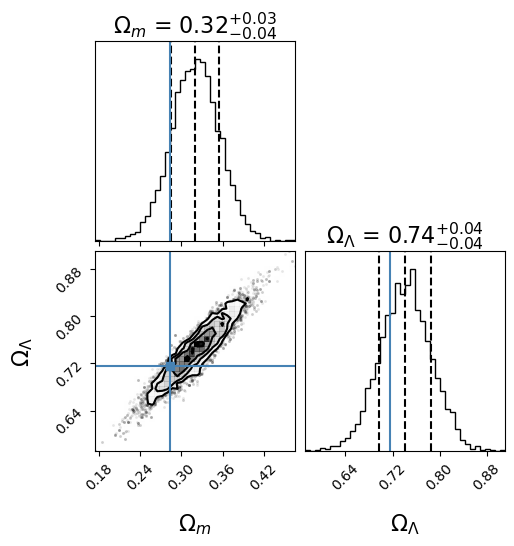

In [32]:
import corner
plt.figure(figsize=(10,10))

# corner takes as input the values to be plotted against each other
# (as combined scatter/contour plots) and for which histograms will be shown, 
# as well many optional inputs such  as labels for each parameter, 
# true values of the parameters (or best-fit values) to overplot; 
# whether to overplot e.g. 68% ranges on the histograms; and whether to add
# titles to each subplot with mean + uncertainty from the MCMC results.
fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],
                      truths=[0.284,0.716],bins=40, quantiles=[0.16, 0.5, 0.84],
                      show_titles=True,title_kwargs={"fontsize": 16},
                      label_kwargs={"fontsize": 16})

A couple of options to get the contour levels right:

__A)__ A Bayesian credible region will contain (68%, 95%, etc.) of the total probability, and hence that fraction of the number of points.  The smallest possible credible region will be the one that contains the (68%, 95%, etc.) of points with highest probability.  Conveniently, in `corner` the contour levels are set as quantiles; if you want just a 68% contour specify `levels=(0.68,)` (yes, with the comma); for 68 + 95%, do `levels = (0.68, 0.95)`.  __Compare the below plot to what the defaults give (above).__

__B)__ If you are doing a frequentist (likelihood) analysis, $\Delta (-2 \ln L)$ (compared to the maximum likelihood) evaluated at the true value of parameters should be distributed as a chi-squared distribution with (number of parameters) degrees of freedom.  We can therefore set cutoff values of $\Delta (-2 \ln L)$ corresponding to the 68, 95%, etc. confidence regions using the percentile point function for the chi-squared distribution.  We did this before when we did a maximum likelihood analysis.

<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
/var/folders/3d/k77s4qq163s7n652qwmt2qcw0000gn/T/ipykernel_26535/1495726111.py:10: SyntaxWarning: invalid escape sequence '\O'
  fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],
/var/folders/3d/k77s4qq163s7n652qwmt2qcw0000gn/T/ipykernel_26535/1495726111.py:10: SyntaxWarning: invalid escape sequence '\O'
  fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],


<Figure size 800x800 with 0 Axes>

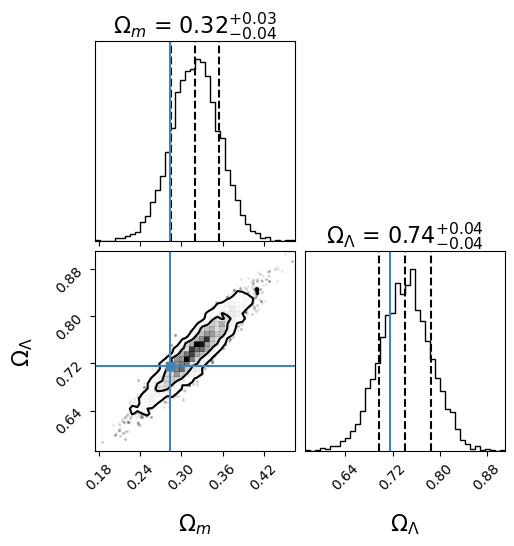

In [33]:
import corner
plt.figure(figsize=(8,8))

# corner takes as input the values to be plotted against each other
# (as combined scatter/contour plots) and for which histograms will be shown, 
# as well many optional inputs such  as labels for each parameter, 
# true values of the parameters (or best-fit values) to overplot; 
# whether to overplot e.g. 68% ranges on the histograms; and whether to add
# titles to each subplot with mean + uncertainty from the MCMC results.
fig = corner.corner(np.exp(samples_emcee), labels=["$\Omega_m$", "$\Omega_\Lambda$"],
                      truths=[0.284,0.716],bins=40, quantiles=[0.16, 0.5, 0.84],
                      show_titles=True,levels=(0.68,.95),
                      title_kwargs={"fontsize": 16},label_kwargs={"fontsize": 16})

## __4) Overlay your data with the best-fit model (or, better yet, an ensemble of models, each  plotted with a small alpha) to make sure the data and model are a reasonable match.__

We can use the `sampler.flatlnprobability` attribute to find the chain step (combining all walkers, and including burnin) with the highest log posterior.

The argmax attribute will be the index corresponding to that point.

In [34]:
# get the index in the flattened chain with the maximum probability
whmax=(sampler.flatlnprobability.argmax())

# determine omegam and omegal at that point.
omegam_opt,omegal_opt = np.exp(sampler.flatchain[whmax,:])
print(f'omegam: {omegam_opt:.4f}, omegal: {omegal_opt:.4f}')


omegam: 0.3261, omegal: 0.7499


__Evaluate: how do the residuals look for this case?__

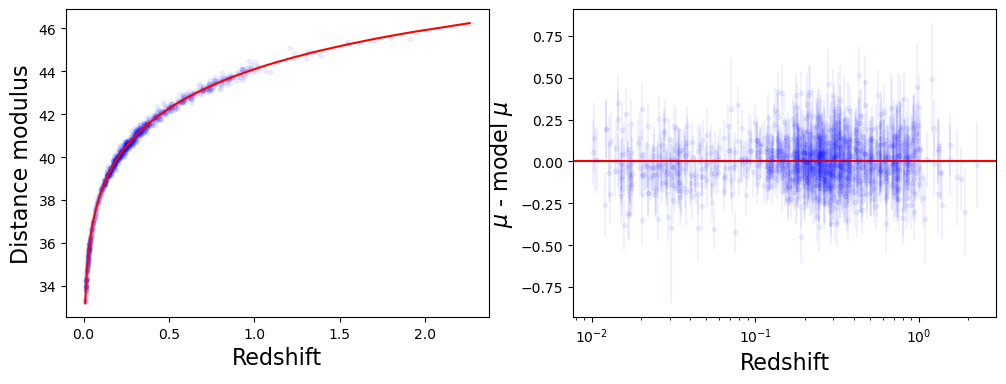

In [35]:

# set up a largely horizontal plotting space
plt.figure(figsize=[12,4])

cosmology=cosmo.LambdaCDM(H0=70,Om0=omegam_opt,Ode0=omegal_opt)
model=np.array( cosmology.distmod(redshift) )

# we'll make 2 plots: one of distance modulus vs. redshift, and one of residuals.  
plt.subplot(1,2,1) 
# distance modulus plot
plt.plot(redshift,mu,'b.',alpha=0.06)
plt.plot(redshift,model,'r-')
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Distance modulus',fontsize=16)

plt.subplot(1,2,2) 
        # residuals plot
plt.errorbar(redshift,mu-model,yerr=error,fmt='b.',alpha=0.06)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel(r'$\mu$ - model $\mu$',fontsize=16)
plt.xscale('log')
plt.axhline(0,color='red')

    

## __5) Check the autocorrelation time of your chains.__  

See https://emcee.readthedocs.io/en/latest/tutorials/autocorr/  .

To calculate the autocorrelation time (a measure of how fast the samples get uncorrelated, you can do:

`sampler.get_autocorr_time(discard=Nburnin,quiet=True)`

(where the 1 indicates we want to use every sample, and Nburnin is the number of samples to discard as burnin).  Unfortunately with a small number of samples `emcee` is unable to calculate this quantity.

We want the autocorrelation time to be much less than the length of the chain (some analyses will use only every N'th sample from a chain, where N >~ the autocorrelation time).

In [36]:
sampler.get_autocorr_time(discard=Nburnin,quiet=True)

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2;
tau: [8.36732551 8.4642045 ]


array([8.36732551, 8.4642045 ])